In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import average_precision_score

In [ ]:
def knn_gridsearch_evaluate(X, y):
    knn = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 10),
                 'metric': ['euclidean','correlation','manhattan'],
                 'weights':['uniform', 'distance']}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv,
                          return_train_score=True, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    #plt.show()
    
    return fpr, tpr

def neural_net_evaluate(X, y, figname):
    mlp = MLPClassifier(solver='adam')
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'hidden_layer_sizes': [(100,100,100)],
                 'alpha': [0.1, 1, 10],
                 'batch_size': [8, 16, 32]}
    
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    mlp_gscv = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv,
                           n_jobs=-1) # Turn on cv train scores
    # fit model to data
    mlp_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(mlp_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(mlp_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    mlp_best = mlp_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        mlp_best.fit(X_train, y_train)
        y_pred = mlp_best.predict(X_test)
        y_score = mlp_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig(figname)
    
    return fpr, tpr

The best performance from the leave-one-out cross-validation:
0.7027027027027027
The parameters for the optimal model:
{'alpha': 1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}
[[11  8]
 [ 5 13]]
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63        19
         1.0       0.62      0.72      0.67        18

    accuracy                           0.65        37
   macro avg       0.65      0.65      0.65        37
weighted avg       0.65      0.65      0.65        37

0.6486486486486487


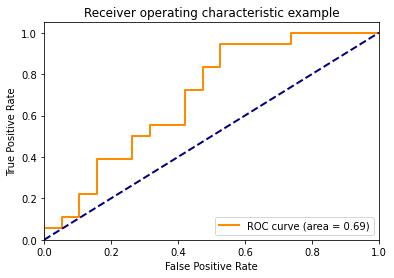

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The best performance from the leave-one-out cross-validation:
0.7837837837837838
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 16, 'hidden_layer_sizes': (100, 100, 100)}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[15  4]
 [ 6 12]]
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75        19
         1.0       0.75      0.67      0.71        18

    accuracy                           0.73        37
   macro avg       0.73      0.73      0.73        37
weighted avg       0.73      0.73      0.73        37

0.7297297297297297


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

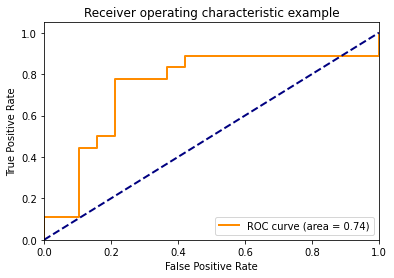

In [ ]:
if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # Neural Network
    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')
    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')
    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')
    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')
    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z_nn, tpr1_z_nn,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z_nn, tpr2_z_nn,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z_nn, tpr3_z_nn,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z_nn, tpr4_z_nn,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z_nn, tpr5_z_nn,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc_all_z.png')
    
    # KNN
'''
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)
''' 
    

The best performance from the leave-one-out cross-validation:
0.6756756756756757
The parameters for the optimal model:
{'alpha': 1, 'batch_size': 32, 'hidden_layer_sizes': (100, 100, 100)}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[15  4]
 [ 5 13]]
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        19
         1.0       0.76      0.72      0.74        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

0.7567567567567568


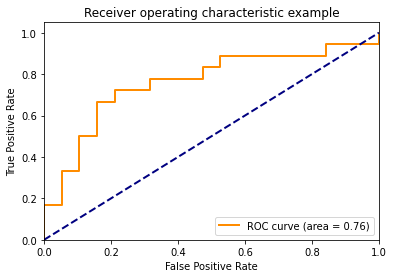

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The best performance from the leave-one-out cross-validation:
0.7837837837837838
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[16  3]
 [ 5 13]]
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        19
         1.0       0.81      0.72      0.76        18

    accuracy                           0.78        37
   macro avg       0.79      0.78      0.78        37
weighted avg       0.79      0.78      0.78        37

0.7837837837837838


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

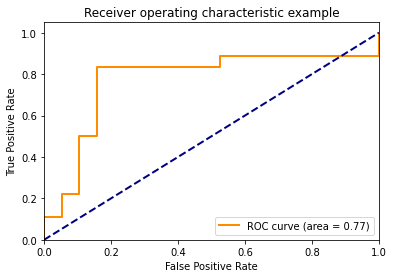

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The best performance from the leave-one-out cross-validation:
0.7647058823529411
The parameters for the optimal model:
{'alpha': 0.1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[12  5]
 [ 5 12]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        17
         1.0       0.71      0.71      0.71        17

    accuracy                           0.71        34
   macro avg       0.71      0.71      0.71        34
weighted avg       0.71      0.71      0.71        34

0.7058823529411765


<Figure size 432x288 with 0 Axes>

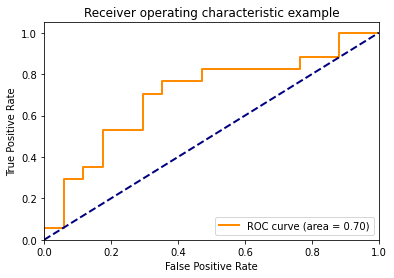

The best performance from the leave-one-out cross-validation:
0.7317073170731707
The parameters for the optimal model:
{'alpha': 1, 'batch_size': 8, 'hidden_layer_sizes': (100, 100, 100)}
[[12  9]
 [ 8 12]]
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59        21
         1.0       0.57      0.60      0.59        20

    accuracy                           0.59        41
   macro avg       0.59      0.59      0.59        41
weighted avg       0.59      0.59      0.59        41

0.5853658536585366


<Figure size 432x288 with 0 Axes>

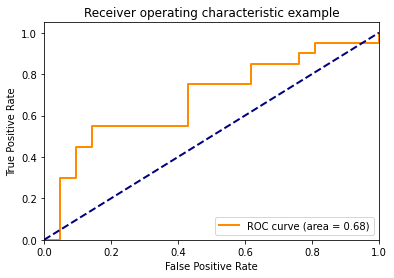

The best performance from the leave-one-out cross-validation:
0.45714285714285713
The parameters for the optimal model:
{'alpha': 1, 'batch_size': 32, 'hidden_layer_sizes': (100, 100, 100)}
[[ 8 10]
 [12  5]]
              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42        18
         1.0       0.33      0.29      0.31        17

    accuracy                           0.37        35
   macro avg       0.37      0.37      0.37        35
weighted avg       0.37      0.37      0.37        35

0.37142857142857144


<Figure size 432x288 with 0 Axes>

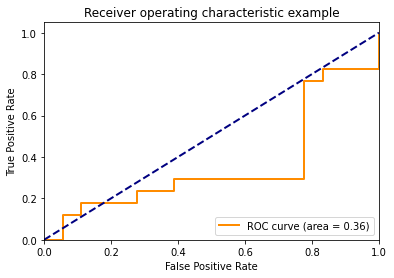

<Figure size 432x288 with 0 Axes>

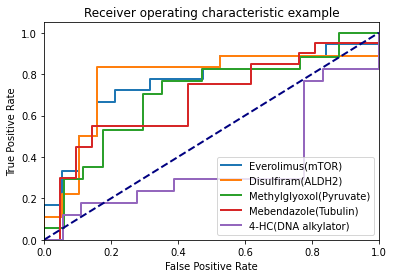

'\n    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)\n    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)\n    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)\n    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)\n    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)\n'

<Figure size 432x288 with 0 Axes>

In [ ]:
if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # Neural Network
    fpr1_z_nn, tpr1_z_nn = neural_net_evaluate(df_X1_zscore, df_y1.values, 'roc_1_z.png')
    fpr2_z_nn, tpr2_z_nn = neural_net_evaluate(df_X2_zscore, df_y2.values, 'roc_2_z.png')
    fpr3_z_nn, tpr3_z_nn = neural_net_evaluate(df_X3_zscore, df_y3.values, 'roc_3_z.png')
    fpr4_z_nn, tpr4_z_nn = neural_net_evaluate(df_X4_zscore, df_y4.values, 'roc_4_z.png')
    fpr5_z_nn, tpr5_z_nn = neural_net_evaluate(df_X5_zscore, df_y5.values, 'roc_5_z.png')

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z_nn, tpr1_z_nn,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z_nn, tpr2_z_nn,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z_nn, tpr3_z_nn,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z_nn, tpr4_z_nn,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z_nn, tpr5_z_nn,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc_all_z.png')
    
    # KNN
'''
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)
''' 
    